# Import Libraries & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

## Deskripsi Kolom

*   **Customer ID:** Pengenal unik untuk setiap pelanggan.
*   **Surname:** Nama keluarga atau nama belakang pelanggan.
*   **Credit Score:** Nilai numerik yang mewakili skor kredit pelanggan.
*   **Geography:** Negara tempat pelanggan tinggal (Prancis, Spanyol, atau Jerman).
*   **Gender:** Jenis kelamin pelanggan (Pria atau Wanita).
*   **Age:** Usia pelanggan.
*   **Tenure:** Jumlah tahun pelanggan telah menjadi nasabah bank.
*   **Balance:** Saldo rekening pelanggan.
*   **NumOfProducts:** Jumlah produk bank yang digunakan pelanggan (misalnya, rekening tabungan, kartu kredit).
*   **HasCrCard:** Apakah pelanggan memiliki kartu kredit (1 = ya, 0 = tidak).
*   **IsActiveMember:** Apakah pelanggan adalah anggota aktif (1 = ya, 0 = tidak).
*   **EstimatedSalary:** Perkiraan gaji pelanggan.
*   **Exited:** Apakah pelanggan telah berhenti berlangganan (1 = ya, 0 = tidak).

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# EDA

## Visualization

/tmp/ipython-input-3975948318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], palette="Set2")


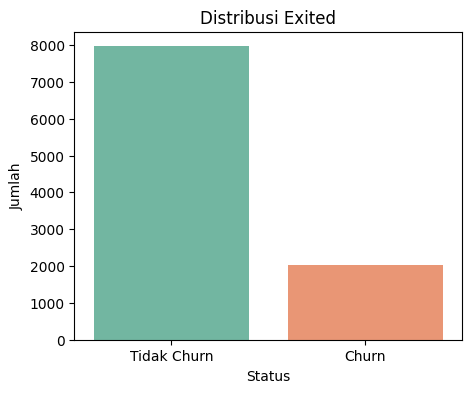

In [ ]:
# Distribusi Target (Churn vs Tidak Churn)
plt.figure(figsize=(5,4))
sns.countplot(x=df['Exited'], palette="Set2")
plt.title("Distribusi Exited")
plt.xticks([0,1], ["Tidak Churn", "Churn"])
plt.ylabel("Jumlah")
plt.xlabel("Status")
plt.show()

/tmp/ipython-input-2141903809.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y='Exited', ci=None, palette="Set2")
/tmp/ipython-input-2141903809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Gender", y='Exited', ci=None, palette="Set2")


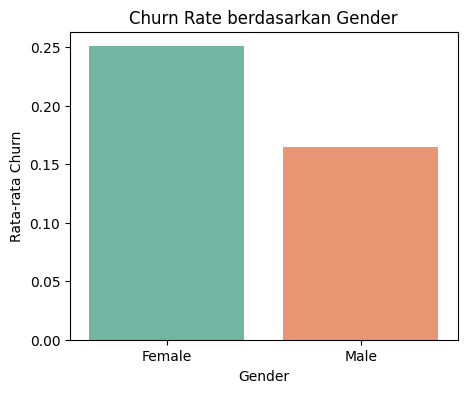

In [ ]:
# Churn Rate berdasarkan Gender
plt.figure(figsize=(5,4))
sns.barplot(data=df, x="Gender", y='Exited', ci=None, palette="Set2")
plt.title("Churn Rate berdasarkan Gender")
plt.ylabel("Rata-rata Churn")
plt.show()

/tmp/ipython-input-3857295747.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Geography", y='Exited', ci=None, palette="Set2")
/tmp/ipython-input-3857295747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Geography", y='Exited', ci=None, palette="Set2")


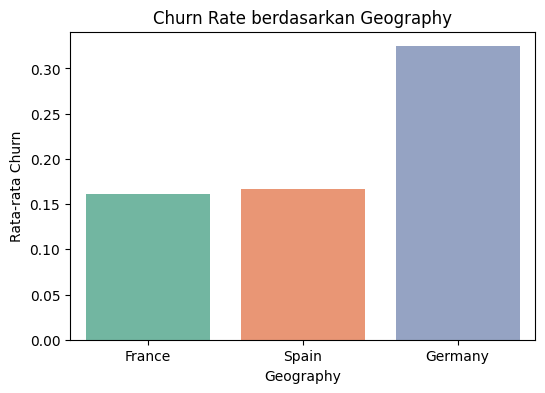

In [ ]:
# Churn Rate berdasarkan Geography
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Geography", y='Exited', ci=None, palette="Set2")
plt.title("Churn Rate berdasarkan Geography")
plt.ylabel("Rata-rata Churn")
plt.show()

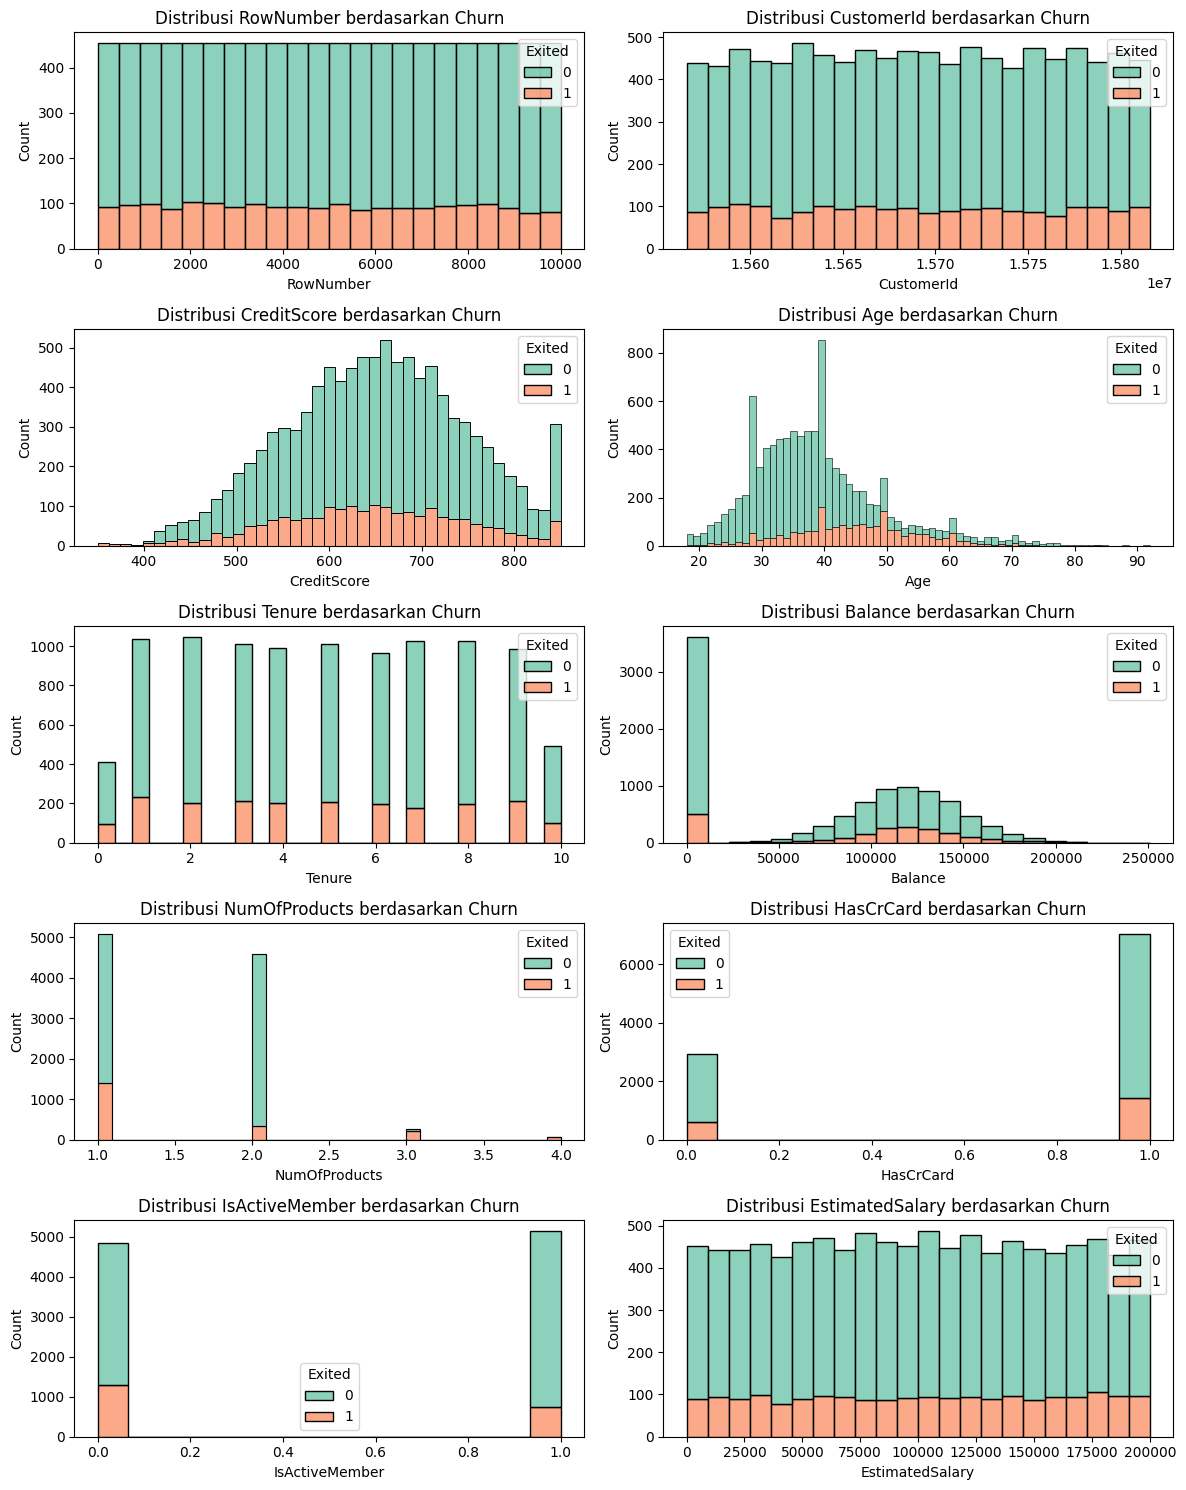

In [ ]:
# Distribusi Fitur Numerik berdasarkan Status Churn
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop('Exited')

fig, axes = plt.subplots(nrows=len(num_cols)//2, ncols=2, figsize=(12, 3*(len(num_cols)//2)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Exited', multiple="stack", ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribusi {col} berdasarkan Churn")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1825139611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y="Age", palette="Set2")


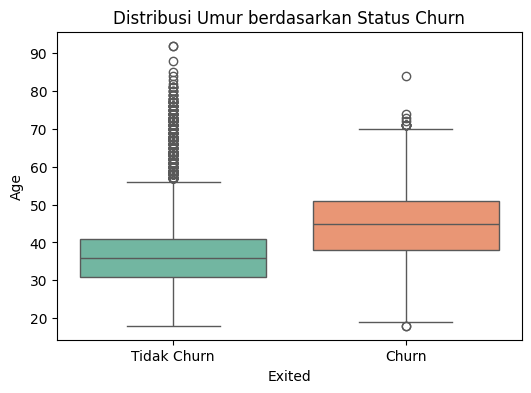

In [ ]:
# Distribusi Umur berdasarkan Status Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Exited', y="Age", palette="Set2")
plt.title("Distribusi Umur berdasarkan Status Churn")
plt.xticks([0,1], ["Tidak Churn", "Churn"])
plt.show()

## Univariate

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


## Bivariate

In [ ]:
df.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['IsActiveMember'].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['Geography'].value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['Tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,5.033279,2.880658,0.0,3.0,5.0,7.0,10.0
1,2037.0,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0


In [ ]:
df.groupby('Exited')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


# Data Preprocessing

In [ ]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], errors="ignore")

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Feature Engineering

In [ ]:
# One-hot encoding untuk kolom kategorikal dengan > 2 kategori
onehot_cols = ["Geography"]
onehot = OneHotEncoder(sparse_output=False, drop="first")
encoded_array = onehot.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded_array, columns=onehot.get_feature_names_out(onehot_cols))

In [ ]:
# Label encoding untuk kolom kategorikal
label_cols = ["Gender"]
encoded_label_df = pd.DataFrame()
for col in label_cols:
    le = LabelEncoder()
    encoded_label_df[col] = le.fit_transform(df[col])

In [ ]:
# Scaling data numerik
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

scaler = StandardScaler()
numerical_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [ ]:
# Numerical Features
numerical_df = df.select_dtypes(include=[np.number]).copy()

In [ ]:
df_clean = pd.concat([
    numerical_df.reset_index(drop=True),
    encoded_df.reset_index(drop=True),
    encoded_label_df.reset_index(drop=True)
], axis=1)

In [ ]:
df_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1


# Modelling

In [ ]:
# Target and Feature
target = "Exited"
X = df_clean.drop(columns=[target]).fillna(0)
y = df_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
X_test.shape

(3000, 11)

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Tidak Churn", "Churn"],
                yticklabels=["Tidak Churn", "Churn"])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## Logistic Regression

=== Logistic Regression ===
Accuracy: 0.816
ROC-AUC: 0.7571349394447973
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2416
           1       0.57      0.22      0.31       584

    accuracy                           0.82      3000
   macro avg       0.70      0.59      0.60      3000
weighted avg       0.78      0.82      0.78      3000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


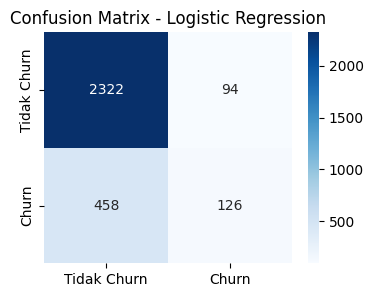

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr, X_test, y_test)

## Random Forest

=== Random Forest ===
Accuracy: 0.867
ROC-AUC: 0.8557706755193686
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



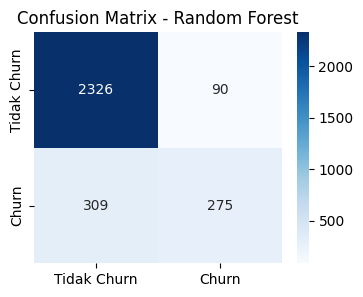

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_test, y_test)

## XGBoost

=== XGBoost ===
Accuracy: 0.873
ROC-AUC: 0.8611085911276422
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.77      0.50      0.61       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000



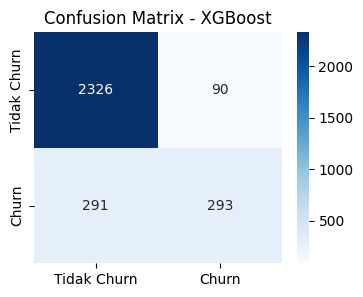

In [ ]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_test, y_test)

/tmp/ipython-input-2149527376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances.head(10), x="importance", y="feature", palette="viridis")


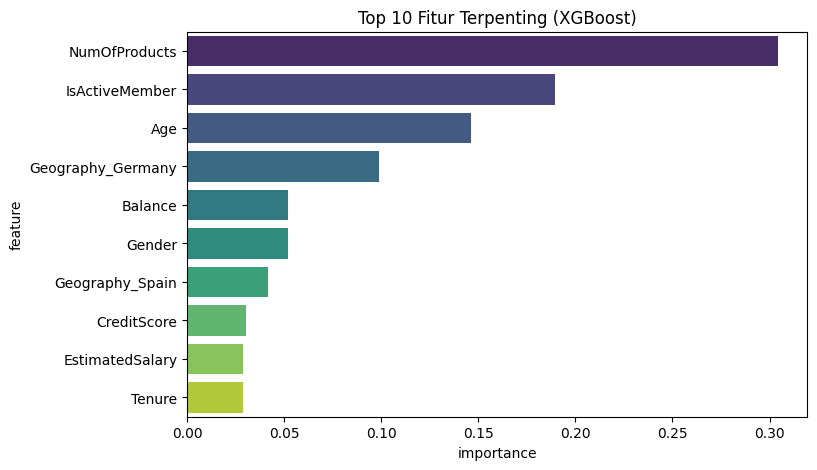

In [ ]:
# Interpretasi Feature Importance untuk model terbaik
feat_importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb.feature_importances_  # contoh pakai XGBoost
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_importances.head(10), x="importance", y="feature", palette="viridis")
plt.title("Top 10 Fitur Terpenting (XGBoost)")
plt.show()

# Insights

**From EDA:**
- **Proporsi churn cukup tinggi** -> sekitar 20%, jadi masalah ini cukup penting
- **Umur** -> Nasabah dengan umur 40 tahun keatas memiliki kecenderungan churn lebih tinggi
- **Geografi** -> Nasabah dari Germany memiliki churn rate lebih tinggi dibandingkan Spain atau France
- **Gender** -> Nasabah perempuan memiliki tingkat churn rate lebih tinggi dibandingkan perempuan
- **Jumlah produk yang dimiliki** -> Nasabah dengan hanya memiliki 1 jumlah produk lebih rentan churn. Sedangkan yang memiliki 2 jumlah produk lebih loyal
<br>
<br>

**From Modelling**
1. **Permodelan**
 - **Logistic Regression** -> lebih mudah diinterpretasi, tetapi performa lebih rendah
 - **Random Forest & XGBoost** -> lebih akurat. Hasil ROC dan AUC mirip
2. **Feature Importance**
 - **NumOfProducts** -> Nasabah dengan hanya 1 produk paling sering churn. Pelanggan dengan 2 produk cenderung loyal
 - **IsActiveMember** -> Nasabah pasif jauh lebih berisiko churn
 - **Age** -> Nasabah lebih tua lebih rentan churn
 - **Geography_Germany** → Churn rate paling tinggi ada di Germany
 - **Balance** -> Nasabah dengan saldo sangat rendah cenderung churn

# Recommendations

1. **Segmentasi usia** -> fokus pada nasabah usia > 40 dengan program retensi khusus.

2. **Produk bundling** -> dorong nasabah untuk memiliki ≥ 2 produk, karena nasabah dengan 2 produk lebih loyal.

3. **Aktivasi nasabah pasif** -> beri insentif/penawaran khusus untuk meningkatkan aktivitas nasabah yang statusnya “Inactive”.

4. **Perhatikan nasabah di Germany** -> buat strategi khusus (customer experience, layanan lokal) untuk mengurangi churn di wilayah ini.

5. **Balance rendah** -> berikan insentif kecil agar tetap menabung (contoh: bebas biaya admin, bunga tabungan lebih tinggi untuk saldo konsisten), atau edukasi keuangan sederhana agar mereka merasa diuntungkan jika tetap menjaga saldo.